# Part One: Logistic Regression for Digit Classification 

In [106]:
# Import packages
import os
import numpy as np
import pandas as pd

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from matplotlib import pyplot as plt
import seaborn as sns


In [107]:
# Load data sets
x_tr = np.loadtxt('./data_digits_8_vs_9_noisy/x_train.csv', delimiter=',', skiprows=1)
x_te = np.loadtxt('./data_digits_8_vs_9_noisy/x_test.csv', delimiter=',', skiprows=1)
y_tr = np.loadtxt('./data_digits_8_vs_9_noisy/y_train.csv', delimiter=',', skiprows=1)
y_te = np.loadtxt('./data_digits_8_vs_9_noisy/y_test.csv', delimiter=',', skiprows=1)

In [108]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df


## 1.1. Logistic regression model fitting 

In [109]:
tr_loss_list = list()
iterations = list(range(1, 41))
log_loss_tr = []
score_logistic = []

for i in iterations:
    lrm = sklearn.linear_model.LogisticRegression(solver = 'liblinear', max_iter = i).fit(x_tr, y_tr) # fit the model
    prob_pred_tr = lrm.predict_proba(x_tr) # predections 
    loss_tr = sklearn.metrics.log_loss(y_tr, prob_pred_tr)
    log_loss_tr.append(loss_tr) # log loss
    score = lrm.score(x_tr, y_tr)
    score_logistic.append(score) # accuracy 

/Users/baovinhnguyen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/baovinhnguyen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/baovinhnguyen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/baovinhnguyen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/baovinhnguyen/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed

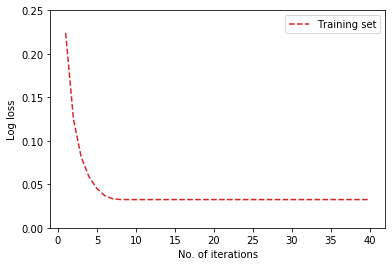

In [110]:
# Plot for log loss 
fig, ax = plt.subplots()
ax.plot(iterations, log_loss_tr, label='Training set', color="tab:red", ls='--')
plt.xlabel('No. of iterations')
plt.ylabel('Log loss')
plt.ylim([0.0, 0.25]);

ax.legend()
plt.show()

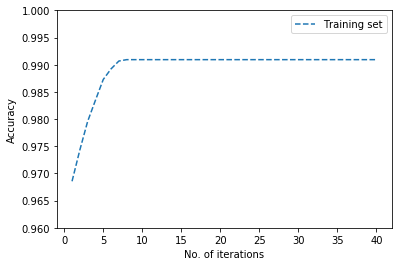

In [111]:
# Plot for accuracy 
fig, ax = plt.subplots()
ax.plot(iterations, score_logistic, label='Training set', color="tab:blue", ls='--')
plt.xlabel('No. of iterations')
plt.ylabel('Accuracy')
plt.ylim([0.96, 1.0]);

ax.legend()
plt.show()

As the number of interations increases, the log loss reduces from 0.224 to 0.032. Similarly, the accuracy increases from 96.86% to 99.09%. This is because the model is using gradient descent to adjust the parameter weights. The more iterations we set, the more adjustments the model will make, which increases accuracy and decreases log loss. As we increase the number of iterations, the precision with which logistic regression tries to fit the data grows. Therefore, the regression algorithm modifies model parameters to account for noise induced fluctuations.

## 1.2. Access the weights 


In [112]:
# Access the first weight
coef_list = []
for i in iterations: 
    weight = lrm.coef_[:, 0] # access the first weight from each iteration 
    coef_list.append(weight) # append all weights from 40 iterations into a list 

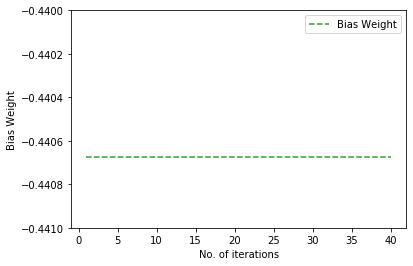

In [113]:
# Plot for iterations - weights  
fig, ax = plt.subplots()
ax.plot(iterations, coef_list, label='Bias Weight', color="tab:green", ls='--')
plt.xlabel('No. of iterations')
plt.ylabel('Bias Weight')
plt.ylim([-0.441, -0.440]);

ax.legend()
plt.show()

We see that the first weight a.k.a. the bias weight remains the same despite the number of iterations. This is because the bias weight is the "fixed component" in logistic regression. It means the predicted value of the regression when all of the independent variables equal to zero. It simply shifts the regression line up or down. Therefore, higher number of iterations will only correct the other weights, not the bias term. 

## 1.3. Explore C values 

In [114]:
log_loss_te = []
accuracy = []
C_grid = np.logspace(-9, 6, 31)
for C in C_grid:
# Build and evaluate model for each value C
    lrm = sklearn.linear_model.LogisticRegression(C = C, solver = 'liblinear').fit(x_tr, y_tr) # fit the model for each C 
    prob_pred_te = lrm.predict_proba(x_te) # predict the dependent variables 
    loss_te = sklearn.metrics.log_loss(y_te, prob_pred_te) # find log loss 
    log_loss_te.append(loss_te) 
    score2 = lrm.score(x_te, y_te)
    accuracy.append(score2)

In [115]:
min_loss_te = min(log_loss_te) # find min log loss 
min_loss_te_ind = log_loss_te.index(min_loss_te) # find index of min log loss  
best_C_2 = C_grid[min_loss_te_ind] # find the respective C value 
best_score = accuracy[min_loss_te_ind]

In [116]:
print(best_C_2)
print(best_score)

0.03162277660168379
0.9672213817448311


In [117]:
calc_confusion_matrix_for_threshold(y_te, np.array(prob_pred_te), 0.5)

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [104]:
print(y_te)
y_te.size

[1. 1. 1. ... 1. 0. 1.]


1983

In [105]:
np.array(prob_pred_te)
prob_pred_te.size

for C 

3966

In [118]:
np.array(prob_pred_te)

array([[0.0000000e+000, 1.0000000e+000],
       [0.0000000e+000, 1.0000000e+000],
       [0.0000000e+000, 1.0000000e+000],
       ...,
       [0.0000000e+000, 1.0000000e+000],
       [1.0000000e+000, 1.9207804e-162],
       [0.0000000e+000, 1.0000000e+000]])

In [120]:
y_te

array([1., 1., 1., ..., 1., 0., 1.])